# Deutsch--Josza Algorithm


### 1. balanced oracle : f(x) = x₀

##### using constant oracle

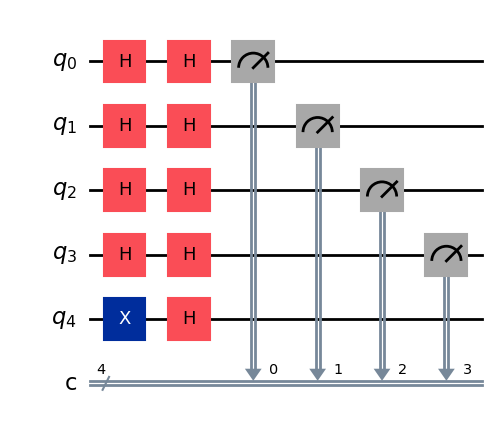

In [11]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

n = 4


qc = QuantumCircuit(n + 1, n)      # Create quantum circuit: n input qubits + 1 ancilla, and n classical bits

#  Prepare ancilla qubit 
qc.x(n)      # Flip ancilla from |0⟩ to |1⟩
qc.h(n)      # Put ancilla in (|0⟩ - |1⟩)/√2

for i in range(n):  # Apply Hadamard to all input qubits
    qc.h(i)

# Step 4: Oracle

def const_oracle(qc, n):     # Constant Oracle (does nothing)
    pass


def bal_oracle(qc, n):
    qc.cx(0, n)  # f(x) = x₀


const_oracle(qc, n)   # Apply constant the oracle


for i in range(n):
    qc.h(i)     # Apply Hadamard to all input qubits again

qc.measure(range(n), range(n))

qc.draw(output='mpl')  

    


In [12]:

from qiskit import transpile
from qiskit_aer import AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result=simulator.run(compiled_circuit, shots=4096).result()
counts = result.get_counts()
print("Measurement Results:", counts)

Measurement Results: {'0000': 4096}


##### using balanced oracle

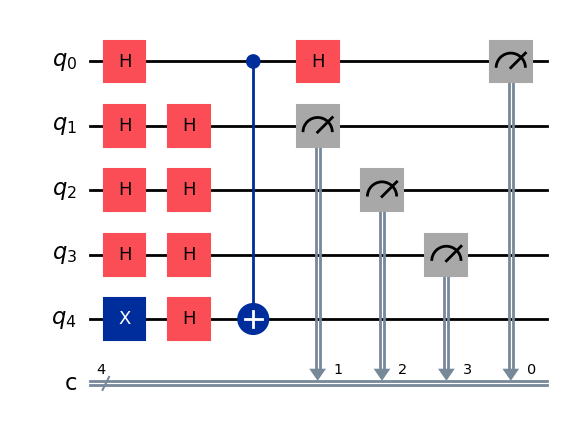

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

m = 4


qc2 = QuantumCircuit(n + 1, n)      # Create quantum circuit: n input qubits + 1 ancilla, and n classical bits

#  Prepare ancilla qubit 
qc2.x(n)      # Flip ancilla from |0⟩ to |1⟩
qc2.h(n)      # Put ancilla in (|0⟩ - |1⟩)/√2

for i in range(n):  # Apply Hadamard to all input qubits
    qc2.h(i)

# Step 4: Oracle

def const_oracle(qc2, n):     # Constant Oracle (does nothing)
    pass


def bal_oracle(qc2, n):        # balance oracle
    qc2.cx(0, n)  # f(x) = x₀


bal_oracle(qc2, n)   # Apply constant the oracle


for i in range(n):
    qc2.h(i)     # Apply Hadamard to all input qubits again

qc2.measure(range(n), range(n))

qc2.draw(output='mpl')  

    


In [14]:
compiled_circuit2 = transpile(qc2, simulator)
result2=simulator.run(compiled_circuit2, shots=4096).result()
counts2 = result2.get_counts()
print("Measurement Results:", counts2)

Measurement Results: {'0001': 4096}
